<a href="https://colab.research.google.com/github/clger007/learning/blob/master/colab_git_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hello github! this is the message from colab!")

hello github! this is the message from colab!


In [1]:
# housing price data

In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv('https://raw.githubusercontent.com/clger007/handson-ml2/master/datasets/housing/housing.csv')

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


total_bedrooms is missing some values, there are only 20433/20640 retrieved

In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
import matplotlib.pyplot as plt

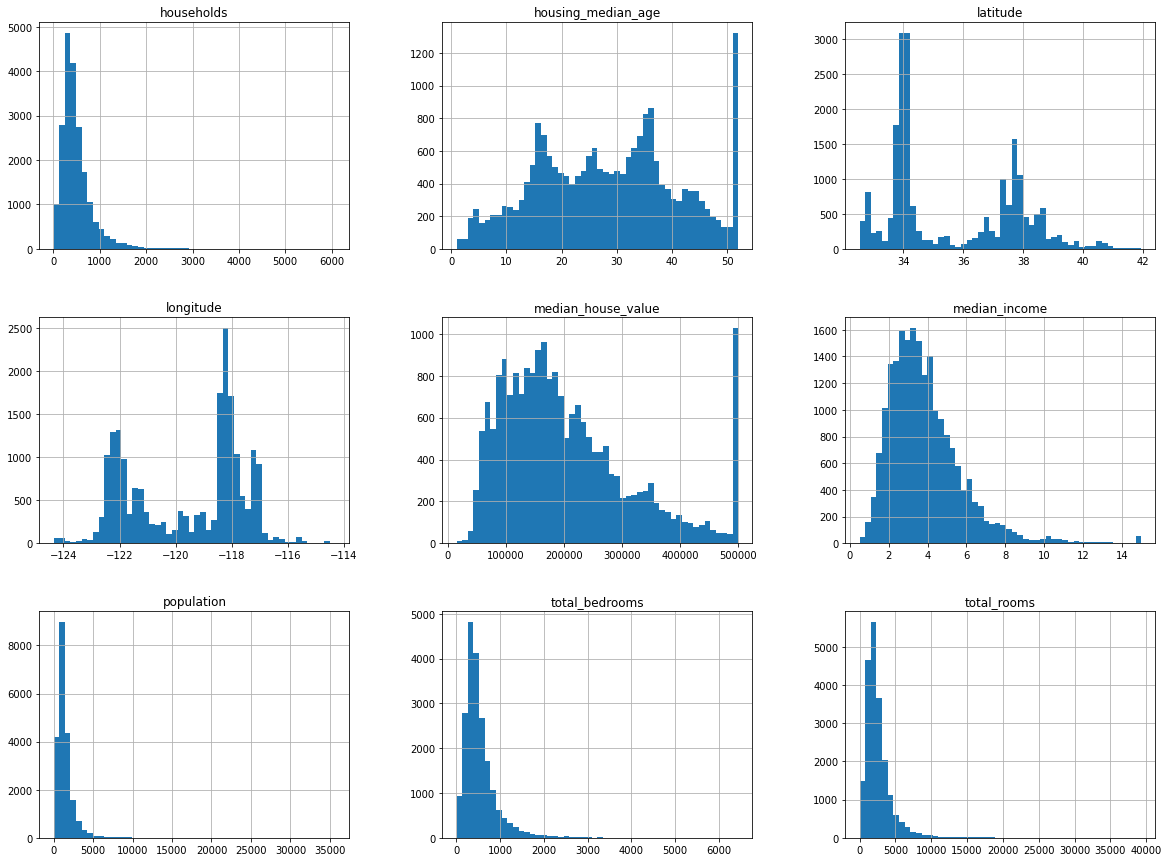

In [12]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [13]:
import numpy as np

In [19]:
def split_train_test(data,test_ratio):
    # permutate each rows of data
    np.random.seed(123)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [20]:
train_set,test_set = split_train_test(housing,.2)

In [21]:
len(train_set),len(test_set)

(16512, 4128)

In [22]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0.,1.5,3.,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])

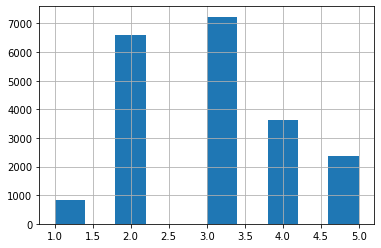

In [24]:
housing['income_cat'].hist()

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

In [26]:
split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=33)
for train_index, test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

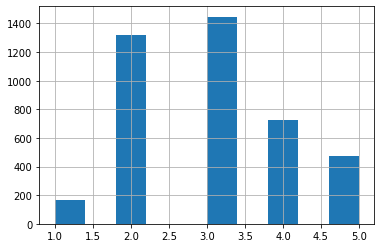

In [27]:
strat_test_set['income_cat'].hist()

In [29]:
len(strat_test_set),len(housing)

(4128, 20640)

In [30]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [45]:
housing = strat_test_set.copy()

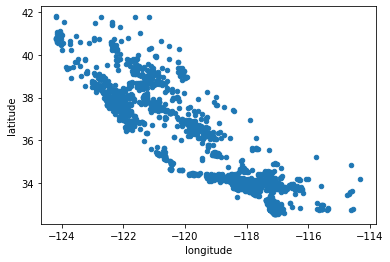

In [46]:
housing.plot(kind='scatter',x='longitude',y='latitude')

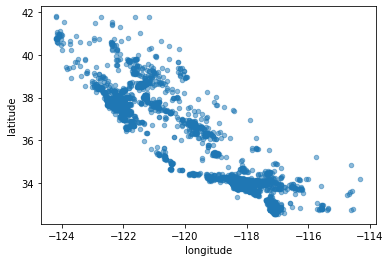

In [52]:
housing.plot(kind='scatter',x='longitude',y='latitude', alpha=.5)
#alpha transparent or opaque

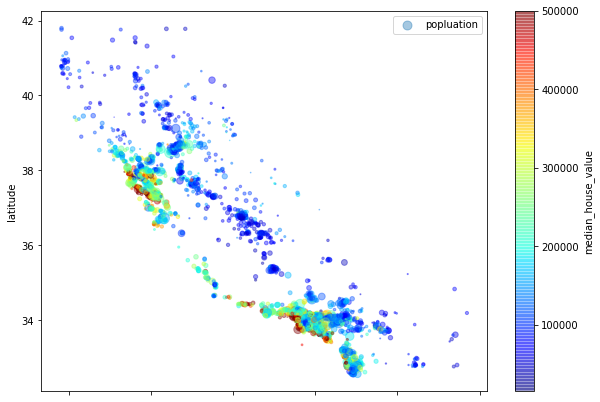

In [68]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=.4,
             s=housing['population']/100,label='popluation',figsize=(10,7),
             c='median_house_value',cmap=plt.get_cmap("jet"),colorbar=True,)
# cmap : color map
# s : size of the marker
plt.legend()

In [63]:
corr_matrix = housing.corr()

In [66]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684010
total_rooms           0.138362
housing_median_age    0.117769
households            0.067552
total_bedrooms        0.050304
population           -0.024666
longitude            -0.049940
latitude             -0.140773
Name: median_house_value, dtype: float64

In [69]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04af130eb8>,
      dtype=object)

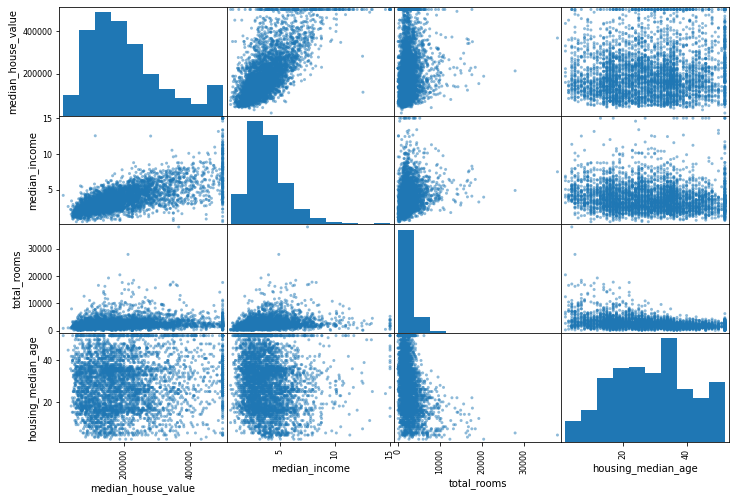

In [70]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

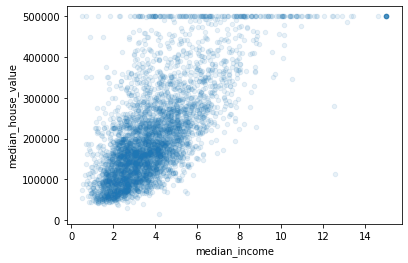

In [71]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=.1)

In [72]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing["total_bedrooms"]/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [73]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=True)

bedrooms_per_room          -0.271143
latitude                   -0.140773
longitude                  -0.049940
population_per_household   -0.040727
population                 -0.024666
total_bedrooms              0.050304
households                  0.067552
housing_median_age          0.117769
rooms_per_household         0.118174
total_rooms                 0.138362
median_income               0.684010
median_house_value          1.000000
Name: median_house_value, dtype: float64

In [74]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [ ]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace=True)

In [77]:
from sklearn.impute import SimpleImputer

In [78]:
imputer = SimpleImputer(strategy="median")

In [80]:
housing_num = housing.drop("ocean_proximity",axis=1)

In [81]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [82]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  435.    , 1166.    ,
        410.    ,    3.5313])

In [83]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  435.    , 1166.    ,
        410.    ,    3.5313])

In [85]:
X = imputer.transform(housing_num)

In [88]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [90]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14343 to 11167
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [91]:
housing_cat = housing[['ocean_proximity']]

In [92]:
housing_cat.head()

,ocean_proximity
14343,NEAR OCEAN
11866,INLAND
12382,INLAND
19802,INLAND
9420,NEAR OCEAN


In [93]:
from sklearn.preprocessing import OrdinalEncoder

In [94]:
ordinal_encoder = OrdinalEncoder()

In [95]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [96]:
housing_cat_encoded[:10]

array([[4.],
       [1.],
       [1.],
       [1.],
       [4.],
       [4.],
       [1.],
       [3.],
       [0.],
       [3.]])

In [98]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [99]:
from sklearn.preprocessing import OneHotEncoder

In [100]:
cat_encoder = OneHotEncoder()

In [102]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [103]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [104]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [105]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]